In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"F:\FINAL\DL_FINAL\No_outliers.csv")
pd.set_option('display.max_columns',None)
df.head(2)


,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_log
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli,94246,0.471702,0,114082,prior,26,0,20,1.0,1.791759
1,1,prepared soups salads,209,Italian Pasta Salad,20,deli,192465,0.891897,1,119977,prior,2,0,16,3.0,1.098612


In [5]:
df['department'].unique()

array(['deli', 'dairy eggs', 'snacks', 'dry goods pasta', 'pantry',
       'other', 'meat seafood', 'bakery', 'household', 'personal care',
       'produce', 'bulk', 'beverages', 'alcohol', 'international',
       'frozen', 'pets', 'breakfast', 'babies', 'canned goods', 'missing'],
      dtype=object)

In [6]:
df.shape

(33819106, 16)

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['aisle_id', 'product_id', 'department_id', 'order_id',
       'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order_log'],
      dtype='object')

FEATURE VS FEATURE

NUMERICAL VS CATEGORICAL

In [8]:
df['department_id'].value_counts() #Categorical

department_id
4     9888378
16    5631067
19    3006412
7     2804175
1     2336858
13    1956819
3     1225181
15    1114857
20    1095540
9      905340
17     774652
12     739238
14     739069
11     468693
18     438743
6      281155
5      159294
8      102221
21      77396
2       38086
10      35932
Name: count, dtype: int64

In [9]:
df['add_to_cart_order'].value_counts()  #Numerical

add_to_cart_order
1.031963     3346083
0.891897     3182490
0.751832     2988129
0.611767     2773069
0.471702     2542770
              ...   
18.857274          1
18.156949          1
18.437079          1
18.297014          1
18.577144          1
Name: count, Length: 145, dtype: int64

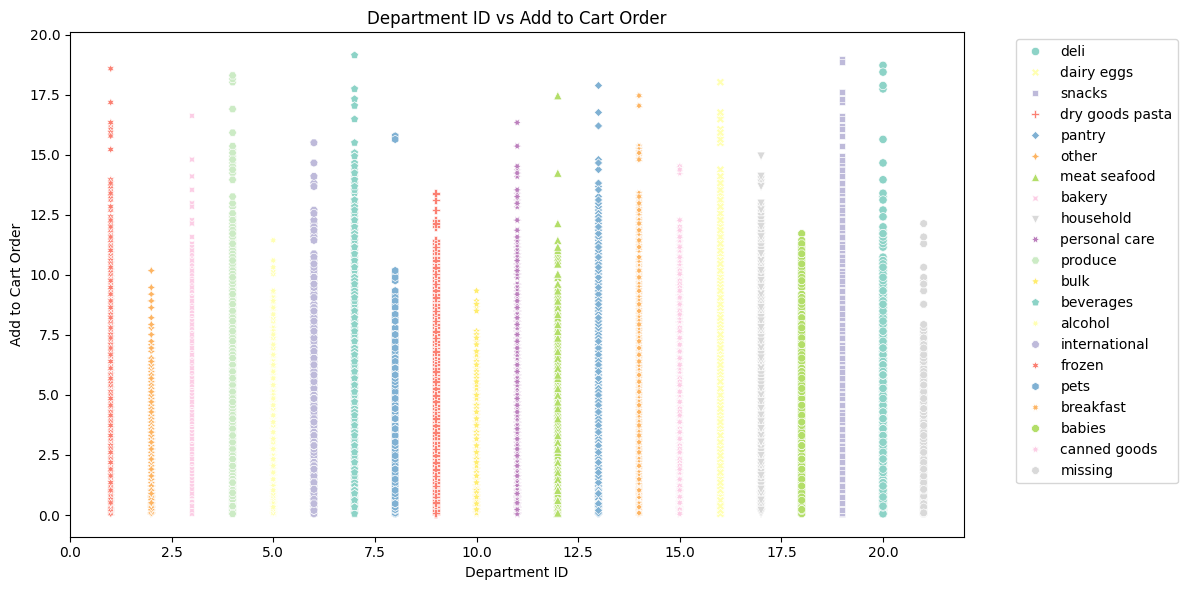

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plot aesthetics are clean
plt.figure(figsize=(12, 6))

# Scatterplot using seaborn
sns.scatterplot(
    x='department_id', 
    y='add_to_cart_order', 
    data=df, 
    hue='department', 
    style='department', 
    palette='Set3'
)

# Set axis labels and title
plt.xlabel('Department ID')
plt.ylabel('Add to Cart Order')
plt.title('Department ID vs Add to Cart Order')

# Show legend and plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # optional, to keep legend outside
plt.tight_layout()
plt.show()


In [13]:
# Grouping of the product_id and product_name and finding the reorder ratio for each product, 
# As there  are numerous categories in products i have done grouping to find the ratio and for a clear graphical representation
reorder_ratio_df = (
    df.groupby(['product_id', 'product_name'])['reordered']
    .mean()
    .reset_index()
    .rename(columns={'reordered': 'reorder_ratio'})
)
print(reorder_ratio_df)



       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49680       49684          Vodka, Triple Distilled, Twist of Vanilla   
49681       49685                 En Croute Roast Hazelnut Cranberry   
49682       49686                                   Artisan Baguette   
49683       49687         Smartblend Healthy Metabolism Dry Cat Food   
49684       49688                             Fresh Foaming Cleanser   

       reorder_ratio  
0           0.614627  
1           0.138298  
2           0.738516  
3           0.458689  
4           0.625000

C:\Users\arpou\AppData\Local\Temp\ipykernel_30136\2103423163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


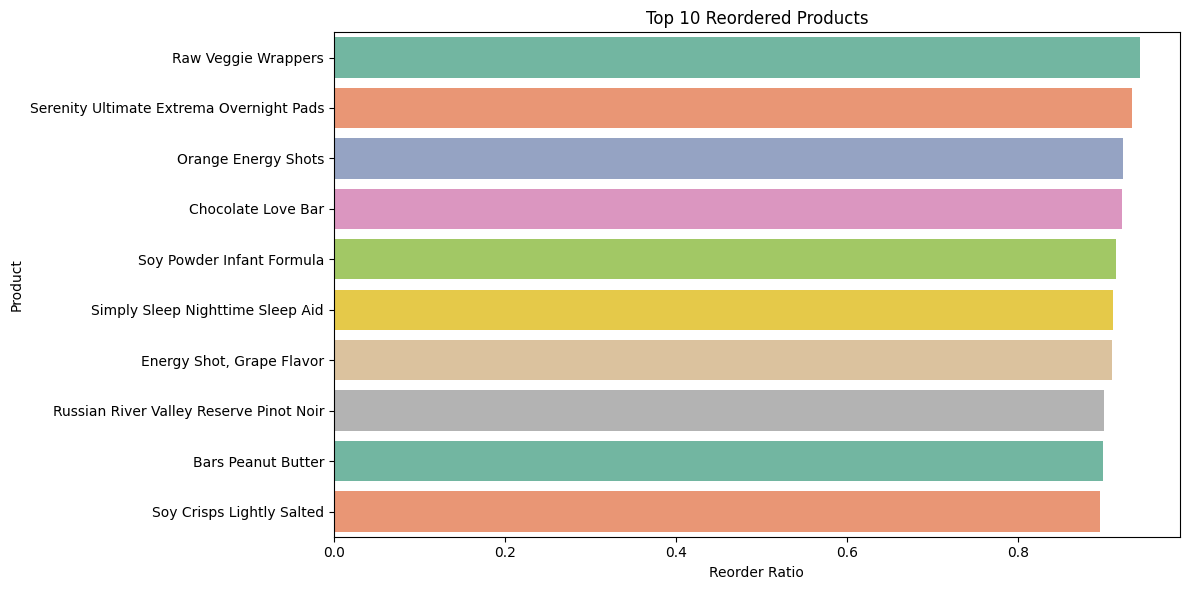

In [14]:
top_10_reordered = reorder_ratio_df.sort_values(by='reorder_ratio', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='reorder_ratio', 
    y='product_name',   
    data=top_10_reordered, 
    palette='Set2'
)

plt.xlabel('Reorder Ratio')
plt.ylabel('Product')
plt.title('Top 10 Reordered Products')



plt.tight_layout()
plt.show()

<Axes: xlabel='product_name'>

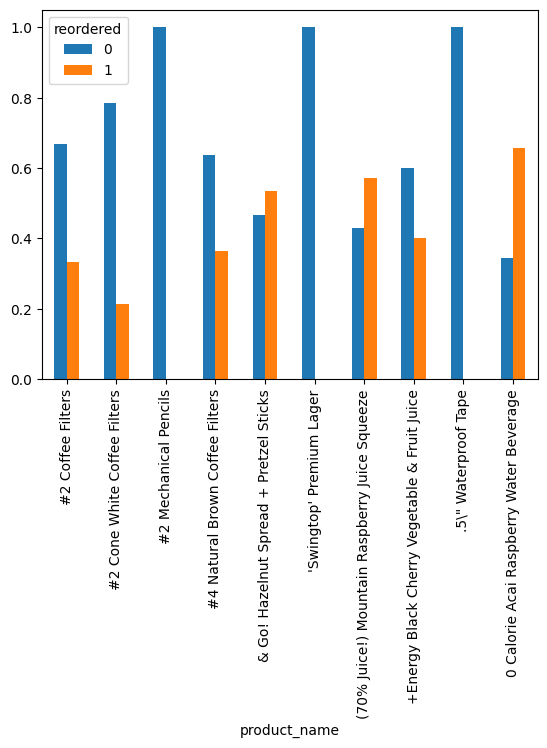

In [15]:
# finding the reorder ratio for each and every product name and plotting.
grouped_df_1 = df.groupby('product_name')['reordered'].value_counts(normalize = True).unstack()
grouped_df_1.head(10).plot(kind = 'bar')


In [16]:
#Filtering top 10 products by grouping  product name and reordered columns 
grouped_df_2 = df.groupby('product_name')['reordered'].sum().reset_index()
grouped_df_2 = grouped_df_2.sort_values(by='reordered', ascending=False).head(10)
grouped_df_2

,product_name,reordered
3677,Banana,415166
3472,Bag of Organic Bananas,329275
31923,Organic Strawberries,214448
28843,Organic Baby Spinach,194939
30300,Organic Hass Avocado,176173
28807,Organic Avocado,140270
32481,Organic Whole Milk,118684
22415,Large Lemon,112178
31366,Organic Raspberries,109688
42908,Strawberries,104588


In [17]:
new_df = df[df['product_name'].isin(grouped_df_2['product_name'])]
new_df

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_log
4350401,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,5,1.031963,1,156122,prior,42,6,16,9.0,0.693147
4350402,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,27,1.031963,1,129389,prior,16,6,20,14.0,0.693147
4350403,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,29,0.751832,1,81606,prior,14,5,12,10.0,1.386294
4350404,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,32,0.751832,1,119216,prior,4,1,19,11.0,1.386294
4350405,24,fresh fruits,13176,Bag of Organic Bananas,4,produce,42,0.751832,1,89125,prior,11,0,20,3.0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31964914,123,packaged vegetables fruits,27966,Organic Raspberries,4,produce,3419364,0.471702,1,178053,train,59,1,7,9.0,1.791759
31964915,123,packaged vegetables fruits,27966,Organic Raspberries,4,produce,3419601,1.031963,1,109812,train,89,5,20,6.0,0.693147
31964916,123,packaged vegetables fruits,27966,Organic Raspberries,4,produce,3419634,0.191572,0,34650,train,15,2,1,14.0,2.079442
31964917,123,packaged vegetables fruits,27966,Organic Raspberries,4,produce,3419765,0.331637,1,137706,train,26,5,8,5.0,1.945910


C:\Users\arpou\AppData\Local\Temp\ipykernel_30136\3325788979.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='product_name', y='reordered', palette='Blues_r')


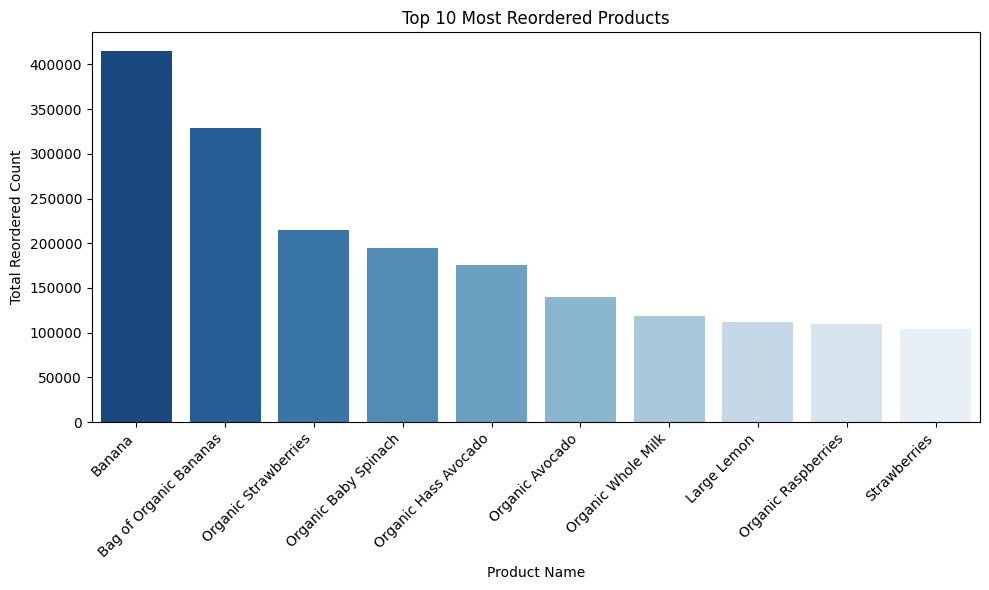

In [18]:
plot_data = new_df.groupby('product_name')['reordered'].sum().reset_index()

# Sort by reordered count
plot_data = plot_data.sort_values(by='reordered', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='product_name', y='reordered', palette='Blues_r')

plt.title('Top 10 Most Reordered Products')
plt.xlabel('Product Name')
plt.ylabel('Total Reordered Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

COLLINEARITY CHECKING

In [19]:
df.columns

Index(['aisle_id', 'aisle', 'product_id', 'product_name', 'department_id',
       'department', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order_log'],
      dtype='object')

CORRELATION CHECKING

In [21]:
actual_numerical_cols = [ 'add_to_cart_order', 'order_id','user_id', 'order_number', 'days_since_prior_order']

In [22]:
actual_categorical_cols = ['aisle_id', 'aisle', 'product_id', 'product_name',  'department_id', 'department', 'reordered', 'eval_set', 'order_dow',
       'order_hour_of_day']

To categorize numerical columns based on how strongly they correlate with the target column

To categorize numerical columns based on how strongly they correlate with the target column add_to_cart_order.
Initialize two empty lists to store:
pos_cols_1: columns positively correlated
neg_cols_1: columns negatively correlated
Loop through each column name in your list of numerical columns.
Calculate the Pearson correlation coefficient between that column and add_to_cart_order.
corr ranges from -1 to +1:
+1: strong positive relationship
-1: strong negative relationship
0: no linear relationship
Prints the correlation value.

Flags correlation strength:
If correlation > 0.2 → treat as positive correlation
If correlation < -0.2 → treat as negative correlation
Threshold of ±0.2 is heuristic (you can adjust it).

End Result
pos_cols_1: Contains names of numerical features positively correlated (correlation > 0.2) with add_to_cart_order.
neg_cols_1: Contains names of numerical features negatively correlated (correlation < -0.2) with add_to_cart_order.

📈 Why This Is Useful
Helps you understand feature relationships with the target.
Useful in feature selection: keeping only relevant variables.
Can guide domain interpretation, feature engineering, or model input optimization

In [23]:
pos_cols_1 = []
neg_cols_1 = []
for col in actual_numerical_cols:
    corr = df[col].corr(df['add_to_cart_order'])
    print(f'Corr {col} :', corr)
    positive_corr = df[col].corr(df['add_to_cart_order']) > 0.2
    negative_corr = df[col].corr(df['add_to_cart_order']) < -0.2
    if positive_corr:
        pos_cols_1.append(col)
    elif negative_corr:
        neg_cols_1.append(col)


Corr add_to_cart_order : 1.0
Corr order_id : -0.0002954023690116009
Corr user_id : 0.0013001117830404268
Corr order_number : 0.0025887108005022653
Corr days_since_prior_order : 0.031001234553159753


In [24]:
pos_cols_1

['add_to_cart_order']

In [25]:
neg_cols_1


[]

In [26]:
pos_cols_2= []
neg_cols_2 = []
for col in actual_numerical_cols:
    corr = df[col].corr(df['order_id'])
    print(f'Corr {col} :', corr)
    positive_corr = df[col].corr(df['order_id']) > 0.2
    negative_corr = df[col].corr(df['order_id']) < -0.2
    if positive_corr:
        pos_cols_2.append(col)
    elif negative_corr:
        neg_cols_2.append(col)


Corr add_to_cart_order : -0.0002954023690116009
Corr order_id : 0.9999999999999999
Corr user_id : -0.0004986701039383966
Corr order_number : -0.00046221385776202086
Corr days_since_prior_order : 0.0006764598998854379


In [27]:
pos_cols_2

['order_id']

In [28]:
neg_cols_2

[]

In [29]:
pos_cols_3= []
neg_cols_3 = []
for col in actual_numerical_cols:
    corr = df[col].corr(df['user_id'])
    print(f'Corr {col} :', corr)
    positive_corr = df[col].corr(df['user_id']) > 0.2
    negative_corr = df[col].corr(df['user_id']) < -0.2
    if positive_corr:
        pos_cols_3.append(col)
    elif negative_corr:
        neg_cols_3.append(col)

Corr add_to_cart_order : 0.0013001117830404268
Corr order_id : -0.0004986701039383966
Corr user_id : 1.0
Corr order_number : -0.000882483996043941
Corr days_since_prior_order : 0.0007795795885644167


In [30]:
pos_cols_3

['user_id']

In [31]:
neg_cols_3

[]

In [32]:
pos_cols_4= []
neg_cols_4 = []
for col in actual_numerical_cols:
    corr = df[col].corr(df['order_number'])
    print(f'Corr {col} :', corr)
    positive_corr = df[col].corr(df['order_number']) > 0.2
    negative_corr = df[col].corr(df['order_number']) < -0.2
    if positive_corr:
        pos_cols_4.append(col)
    elif negative_corr:
        neg_cols_4.append(col)

Corr add_to_cart_order : 0.0025887108005022653
Corr order_id : -0.0004622138577620209
Corr user_id : -0.0008824839960439411
Corr order_number : 1.0
Corr days_since_prior_order : -0.3584554428690268


In [33]:
pos_cols_4

['order_number']

In [34]:
neg_cols_4

['days_since_prior_order']

In [35]:
pos_cols_5 = []
neg_cols_5 = []
for col in actual_numerical_cols:
    corr = df[col].corr(df['days_since_prior_order'])
    print(f'Corr {col} :', corr)
    positive_corr = df[col].corr(df['days_since_prior_order']) > 0.2
    negative_corr = df[col].corr(df['days_since_prior_order']) < -0.2
    if positive_corr:
        pos_cols_5.append(col)
    elif negative_corr:
        neg_cols_5.append(col)

Corr add_to_cart_order : 0.031001234553159757
Corr order_id : 0.000676459899885438
Corr user_id : 0.0007795795885644168
Corr order_number : -0.3584554428690268
Corr days_since_prior_order : 1.0


In [36]:
pos_cols_5

['days_since_prior_order']

In [37]:
neg_cols_5

['order_number']

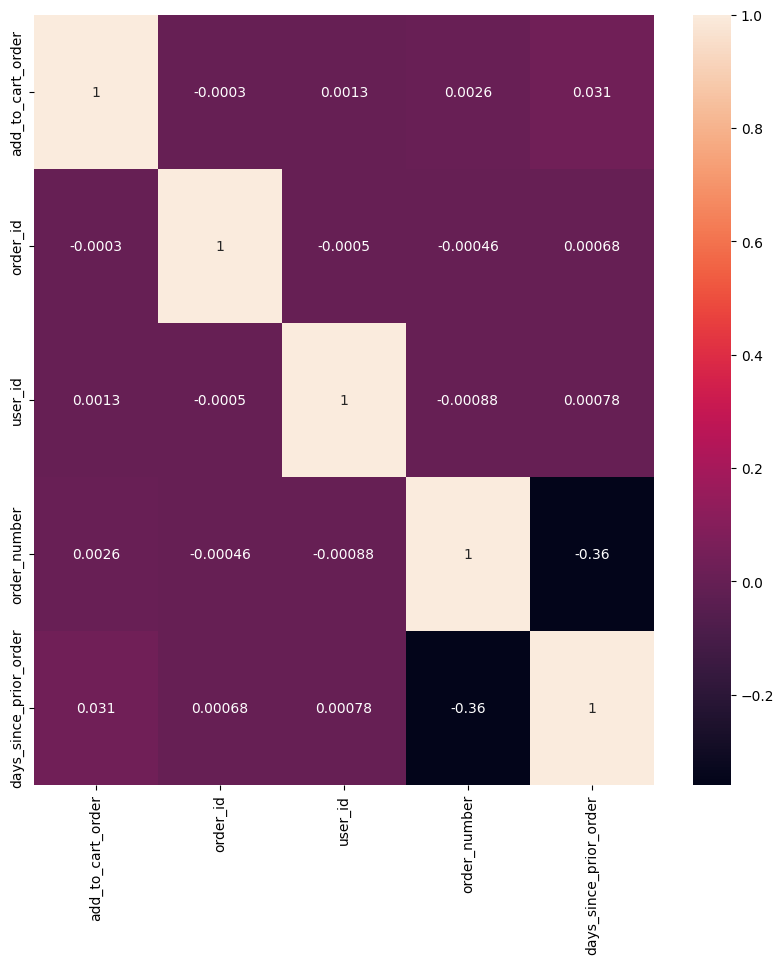

In [38]:
#Collinearity Checking
plt.figure(figsize=(10,10))
sns.heatmap(df[actual_numerical_cols].corr(),annot=True)
plt.show()

🧠 Explanation
1. plt.figure(figsize=(10,10))
Sets the size of the figure to be 10x10 inches. This makes the heatmap more readable, especially if there are many variables.

2. df[actual_numerical_cols].corr()
Computes the correlation matrix of the numerical columns specified in the list actual_numerical_cols.

Each cell in this matrix contains a correlation coefficient between two variables (values range from -1 to 1):

+1: Perfect positive correlation

0: No correlation

-1: Perfect negative correlation

3. sns.heatmap(..., annot=True)
Plots the heatmap using Seaborn, with the computed correlations.

annot=True: Annotates each cell with the actual correlation value.

4. plt.show()
Renders the plot to the screen.

In [39]:
df.to_csv('after_eda.csv', index = False)